# DATA 620 - Week 3 - Team1


The task this week is to: 
1.  Load a graph of your choosing from a text file or other source into a graph database or NetworkX.
2.  Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.
3.  Use a visualization tool of your choice ( NetworkX, Neo4j, Gephi, etc.) to display information.
4.  Record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.


For this task we've chosen to work with a subset of the latest movielense data, which has been added to [github](https://github.com/plb2018/data620/tree/master/Week3/ml-latest-small) to facilitate easy reproducibility.

First, we'll set do some setup.  I used a local path just to make things easier when creating and saving an "adjacency list" file, which has subsequently been loaded to github also.

In [290]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import requests
import csv


path = 'https://raw.githubusercontent.com/plb2018/data620/master/Week3/ml-latest-small/'
localPath = 'C:/Users/Paul/OneDrive - CUNY School of Professional Studies/CUNY/DATA 620/Week3/'
numRows = 200  #the number of rows we'll work with. 

Next, we'll do a bit of data wangling.  I was read a little bit about [Adjacency Lists](https://networkx.github.io/documentation/networkx-1.10/reference/readwrite.adjlist.html) and I figured that it could be a usefule way to work in this class (particularly to facilitate data-sharing in the HW team context) so I figured that I would start there.

In the Movielense data, the "movies.csv" file there is the main delimiter (comma) but also a pipe (|) delimiter within the "genres" column.  We'll need to account for this when parsing and preparing.

And another note, we'll remove take all the "documentary" films from this set because they really seem to be their own separate genre and seem to have zero overlap with other movies within the context of the structure of the network created below.

In [291]:
#first we load and subset the data
movies = pd.read_csv(path+'movies.csv')
movies = movies.head(numRows)

#remove all the quotes and drop documentaries
movies  = movies[~movies.genres.str.contains("Documentary")]


#create the adjacency list
movies["adjList"] = movies["title"].astype(str)+'|'+movies["genres"]

#save adjlist locally and we'll manually move to github 
movies["adjList"].to_frame().to_csv(localPath+'adj.csv',index=False,header=False)

#Print a few rows just to make sure we're getting what we want
print(movies["adjList"].head(11))

0     Toy Story (1995)|Adventure|Animation|Children|...
1             Jumanji (1995)|Adventure|Children|Fantasy
2                Grumpier Old Men (1995)|Comedy|Romance
3         Waiting to Exhale (1995)|Comedy|Drama|Romance
4             Father of the Bride Part II (1995)|Comedy
5                     Heat (1995)|Action|Crime|Thriller
6                         Sabrina (1995)|Comedy|Romance
7                Tom and Huck (1995)|Adventure|Children
8                            Sudden Death (1995)|Action
9            GoldenEye (1995)|Action|Adventure|Thriller
10    American President, The (1995)|Comedy|Drama|Ro...
Name: adjList, dtype: object


We now have a pip-delimited adjacency file.  Next we'll create the graph from the adjacency file and output a few things as a check.

In [292]:

#pull the adjList from github
url = 'https://raw.githubusercontent.com/plb2018/data620/master/Week3/adj.csv'
r = requests.get(url)

#G=nx.read_adjlist(r,delimiter='|')
G=nx.read_adjlist(localPath+'adj.csv',delimiter='|')

print("-----Printing Network Info:")
print(nx.info(G))
print("\n")

#check nodes and edges
print("-----Printing Nodes:")
for i,node in enumerate(G.nodes()):
    if i>5:
        break
    print(i,node)
print("\n")
    
print("-----Printing Edges:")
for i,edge in enumerate(G.edges()):
    if i>5:
        break
    print(i,edge)
print("\n")


-----Printing Network Info:
Name: 
Type: Graph
Number of nodes: 220
Number of edges: 430
Average degree:   3.9091


-----Printing Nodes:
0 Toy Story (1995)
1 Adventure
2 Animation
3 Children
4 Comedy
5 Fantasy


-----Printing Edges:
0 ('Toy Story (1995)', 'Adventure')
1 ('Toy Story (1995)', 'Animation')
2 ('Toy Story (1995)', 'Children')
3 ('Toy Story (1995)', 'Comedy')
4 ('Toy Story (1995)', 'Fantasy')
5 ('Adventure', 'Jumanji (1995)')




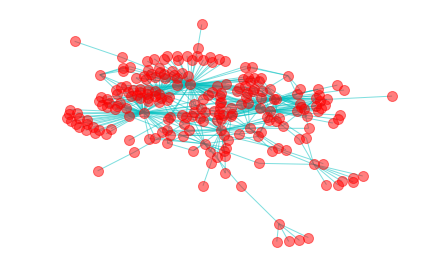

In [293]:
#draw and show the graph
nx.draw_networkx(G,with_labels=False,node_size=100,node_color='r',edge_color='c',alpha=0.5)

#fix the margins
plt.tight_layout()

#turn off the axis
plt.axis('off')

#display the graph
plt.show()

We can see the graph of the network above.  Based on what we know about the data, we can guess that the nodes with the most activity are popular movie "genres" and that the rest are movie titles.  If time remains, I intend to clean up this graph and add a bit more information.

Now we'll compute the [diameter](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.distance_measures.diameter.html) using the networkx builtin function.  The diameter of the graph is the maximum eccentricity, which is basically the farthest distance between two points.

In [294]:
d = nx.diameter(G)
print(d)

9


We can see from the above that the diameter of this particular graph is 9.  Next we'll look at hubs and authorities using [hits](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.link_analysis.hits_alg.hits.html).  

Hubs are nodes which have links greatly in excess of the average.  In our case, we would expect movies that span multiple genres to be considered hubs, which is essentially what we see.

In this context, an "Authority" is a node which links to many hubs.  Give the above assessment of hubs, we should expect that, for the most part, authorities should intuitively be somewhat similar to "genres" in this network.  Let's check by comparing the score to the number of neighbors per node:  

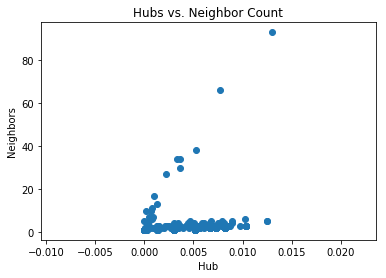

                                                 hubs  neighbors
Drama                                        0.013005         93
Money Train (1995)                           0.012457          5
Bad Boys (1995)                              0.012457          5
Something to Talk About (1995)               0.010351          3
Don Juan DeMarco (1995)                      0.010351          3
Waiting to Exhale (1995)                     0.010351          3
Beautiful Girls (1996)                       0.010351          3
Eat Drink Man Woman (Yin shi nan nu) (1994)  0.010351          3
Mighty Aphrodite (1995)                      0.010351          3
Strange Days (1995)                          0.010229          6


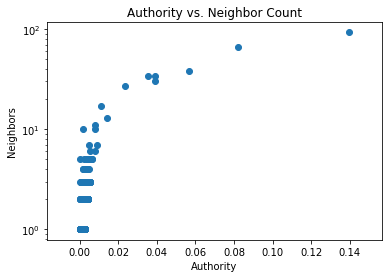

           authorities  neighbors
Drama         0.139761         93
Comedy        0.082240         66
Romance       0.056785         38
Thriller      0.039018         34
Crime         0.038983         30
Action        0.035492         34
Adventure     0.023547         27
Mystery       0.014170         13
Children      0.010936         17
War           0.009129          7
                                                    authorities  neighbors
"Browning Version, The (1994)                          0.000034          1
"Awfully Big Adventure, An (1995)                      0.000034          1
"Cure, The (1995)                                      0.000034          1
"Basketball Diaries, The (1995)                        0.000034          1
"Cry, the Beloved Country (1995)                       0.000034          1
Wild Bill (1995)                                       0.000014          1
"Brothers McMullen, The (1995)                         0.000002          1
"Birdcage, The (1996)     

In [296]:
h,a=nx.hits(G)

h = pd.DataFrame.from_dict(data=h,orient='index',columns=['hubs'])
h.sort_values(by='hubs',ascending=False,inplace=True)

def getIndex(df):
    return df.name

h['neighbors'] = h.apply(lambda x: len(list(G.neighbors(getIndex(x)))),axis=1)

plt.scatter(h.hubs,h.neighbors)
#plt.yscale("log")

plt.title("Hubs vs. Neighbor Count")
plt.xlabel("Hub")
plt.ylabel("Neighbors")
plt.show()

print(h.head(10))

a = pd.DataFrame.from_dict(data=a,orient='index',columns=['authorities'])
a['neighbors'] = a.apply(lambda x: len(list(G.neighbors(getIndex(x)))),axis=1)

a.sort_values(by='authorities',ascending=False,inplace=True)
plt.scatter(a.authorities,a.neighbors)
plt.yscale("log")
plt.title("Authority vs. Neighbor Count")
plt.xlabel("Authority")
plt.ylabel("Neighbors")
plt.show()
plt.show()

print(a.head(10))


The plots didn't turn out as well as hoped / expected, however the relationship is clear.  Higher Hub Scores show a positive relationship with the number of neighbors.  "Drama" is way over-represented here for some reason and may be explained by the small size of the subset used.

The relatioship looks even better for Authority where we can see, as we should expect, that the "genres" themselves are strongly represented. 

I suspect that these relationships would become significantly clearer if we ran a larger subset of the data (10K)

### Footnotes

Our team seems to be in mutal agreement about each trying the work ourselves and then discussing our findings and choosing 1 idea to collaborate on / submit.  To that end, we took a stab at Neo4j and the effort is documented [here](https://github.com/kmehdi2017/web-analytics/blob/master/WK3/Neo4j_attempt.docx).  

Another parallel effort of our networkX effort is available [here](https://github.com/kmehdi2017/web-analytics/blob/master/WK3/week3.ipynb)


